In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
def get_data(n_train_samples=10000):
    # Retrieve MNIST dataset from Tensorflow Keras datasets
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    
    # Select 10000 random samples from x_train
    np.random.seed(1)
    indices = list(range(x_train.shape[0]))
    np.random.shuffle(indices)
    train_idx = indices[:n_train_samples]
    x_train = x_train[train_idx].reshape(n_train_samples, -1)
    y_train = y_train[train_idx]
    x_test = x_test.reshape(x_test.shape[0], -1)
    
    # Normalize data
    x_train.astype(np.float32)
    x_test.astype(np.float32)
    x_train = np.multiply(x_train, 1.0/255)
    x_test = np.multiply(x_test, 1.0/255)
    
    return x_train, y_train, x_test, y_test

In [12]:
def generate_synthetic_data(x, r1, r2):
    # Perform the operation to generate synthetic data
    o = np.dot(x, r1) ** 2 + np.dot(x, r2) ** 2  # real and complex part
    return o

In [13]:
def fit_ridge_classifier(x_train, y_train, x_test, y_test, alpha=0.001):
    # Fit a Ridge Classifier
    clf = RidgeClassifier(alpha=alpha)
    clf.fit(x_train, y_train.ravel())
    
    # Evaluate prediction accuracy on training and test data
    train_accuracy = clf.score(x_train, y_train)
    test_accuracy = clf.score(x_test, y_test)
    return train_accuracy, test_accuracy

def decision_tree_classifier(x_train, y_train, x_test, y_test, alpha=0.001):
    # Fit a Ridge Classifier
    clf = RandomForestClassifier(random_state=50)
    clf.fit(x_train, y_train.ravel())
    
    # Evaluate prediction accuracy on training and test data
    train_accuracy = clf.score(x_train, y_train)
    test_accuracy = clf.score(x_test, y_test)
    return train_accuracy, test_accuracy

In [14]:
# Get Data

x_train, y_train, x_test, y_test = get_data()

In [64]:
# Run experiments

train_acc_list = []
test_acc_list = []

feature_size_list = sorted([1000 * k for k in range(1, 16)] + [250, 500, 1500, 2500, 9500, 10500, 17500, 20000, 22500, 25000, 27500, 30000])
for num_feature in feature_size_list:
    dim = 28 * 28
    R1 = np.random.randn(dim, num_feature) / np.sqrt(num_feature)
    R2 = np.random.randn(dim, num_feature) / np.sqrt(num_feature)
    x_train_synthetic = generate_synthetic_data(x_train, R1, R2)
    x_test_synthetic = generate_synthetic_data(x_test, R1, R2)
    
    train_accuracy, test_accuracy = fit_ridge_classifier(x_train_synthetic, y_train, x_test_synthetic, y_test)
    train_acc_list.append(train_accuracy)
    test_acc_list.append(test_accuracy)
    print ("Number of features: %d. Training accuracy: %.3f. Test accuracy: %.3f" % (num_feature, train_accuracy, test_accuracy))

Number of features: 250. Train accuracy: 0.896. Test accuracy: 0.886
Number of features: 500. Train accuracy: 0.933. Test accuracy: 0.914
Number of features: 1000. Train accuracy: 0.967. Test accuracy: 0.941
Number of features: 1500. Train accuracy: 0.978. Test accuracy: 0.946
Number of features: 2000. Train accuracy: 0.986. Test accuracy: 0.948
Number of features: 2500. Train accuracy: 0.992. Test accuracy: 0.951
Number of features: 3000. Train accuracy: 0.995. Test accuracy: 0.949
Number of features: 4000. Train accuracy: 0.998. Test accuracy: 0.943
Number of features: 5000. Train accuracy: 1.000. Test accuracy: 0.938
Number of features: 6000. Train accuracy: 1.000. Test accuracy: 0.917
Number of features: 7000. Train accuracy: 1.000. Test accuracy: 0.903
Number of features: 8000. Train accuracy: 1.000. Test accuracy: 0.878
Number of features: 9000. Train accuracy: 1.000. Test accuracy: 0.856
Number of features: 9500. Train accuracy: 1.000. Test accuracy: 0.856
Number of features: 97

In [ ]:
# Plot Train and Test Error

plt.figure(figsize=(10, 10))
plt.plot(feature_size_list, 1-np.array(test_acc_list), label = "Test Error")
plt.plot(feature_size_list, 1-np.array(train_acc_list), label = "Training Error")
plt.xlabel('Number of features', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.title('Double Descent', fontsize=16)
plt.grid()
plt.legend(fontsize='16')
plt.show()

In [15]:
# Run experiments

train_acc_list = []
test_acc_list = []

feature_size_list = sorted([1000 * k for k in range(1, 16)] + [250, 500, 1500, 2500, 9500, 10500, 17500, 20000, 22500, 25000, 27500, 30000])
for num_feature in feature_size_list:
    dim = 28 * 28
    R1 = np.random.randn(dim, num_feature) / np.sqrt(num_feature)
    R2 = np.random.randn(dim, num_feature) / np.sqrt(num_feature)
    x_train_synthetic = generate_synthetic_data(x_train, R1, R2)
    x_test_synthetic = generate_synthetic_data(x_test, R1, R2)
    
    train_accuracy, test_accuracy = decision_tree_classifier(x_train_synthetic, y_train, x_test_synthetic, y_test)
    train_acc_list.append(train_accuracy)
    test_acc_list.append(test_accuracy)
    print ("Number of features: %d. Training accuracy: %.3f. Test accuracy: %.3f" % (num_feature, train_accuracy, test_accuracy))

Number of features: 250. Training accuracy: 1.000. Test accuracy: 0.872
Number of features: 500. Training accuracy: 1.000. Test accuracy: 0.891
Number of features: 1000. Training accuracy: 1.000. Test accuracy: 0.897
Number of features: 1500. Training accuracy: 1.000. Test accuracy: 0.903
Number of features: 2000. Training accuracy: 1.000. Test accuracy: 0.903
Number of features: 2500. Training accuracy: 1.000. Test accuracy: 0.906
Number of features: 3000. Training accuracy: 1.000. Test accuracy: 0.904
Number of features: 4000. Training accuracy: 1.000. Test accuracy: 0.906
Number of features: 5000. Training accuracy: 1.000. Test accuracy: 0.906
Number of features: 6000. Training accuracy: 1.000. Test accuracy: 0.906
Number of features: 7000. Training accuracy: 1.000. Test accuracy: 0.906
Number of features: 8000. Training accuracy: 1.000. Test accuracy: 0.907
Number of features: 9000. Training accuracy: 1.000. Test accuracy: 0.908


KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (27,) and (13,)

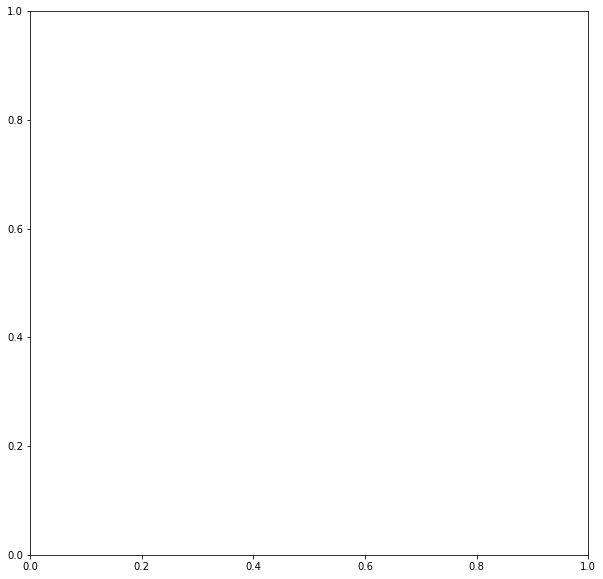

In [16]:
# Plot Train and Test Error

plt.figure(figsize=(10, 10))
plt.plot(feature_size_list, 1-np.array(test_acc_list), label = "Test Error")
plt.plot(feature_size_list, 1-np.array(train_acc_list), label = "Training Error")
plt.xlabel('Number of features', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.title('Double Descent', fontsize=16)
plt.grid()
plt.legend(fontsize='16')
plt.show()